In [915]:
# import the libraies that will be using
import numpy as np
import pandas as pd
import vaex 
import glob
import matplotlib.pylab as plt

In [1029]:
# open the hdf5 file with vaex, todealing with the large dataset, should convert the csv to hdf5
# caution with Windows operating system, python 3.8 with Windows may cause bugs when dealing with vaex

df = vaex.open('listings_hdf5.hdf5')


In [1017]:
# testing the is_rental correctness
#df['is_rental']
#(df.is_rental.values == 'f').sum() # 3508281
#(df.is_rental.values == 't').sum() # 406839
#(df.is_rental.values != 'f').sum() # 406968
#(df.is_rental.values != 't').sum() # 3508410

In [1018]:
df.describe()

,address,municipality,province,postal_code,geocoding_type_id,id,mls,price,description,bedrooms,bathrooms,url,search,broker_id,status_id,style_id,created_at,updated_on,the_geom,provider_id,virtual_tour_url,web_bug_url,quad_tree,title,real_estate_board_id,bedrooms_partial,bathrooms_partial,source_id,email,extras,address_components,listing_images_count,parking_spaces,has_garage,has_locker,url_slug,square_footage,kitchen_count,is_rental,expired_at,sold_price,sold_at,thumbnails_count,address_id,address_ids
dtype,str,str,str,str,float64,int64,str,float64,str,float64,float64,float64,str,float64,int64,int64,str,str,str,int64,str,float64,str,str,float64,float64,float64,int64,float64,str,str,int64,float64,str,str,str,str,float64,str,str,float64,str,float64,float64,str
count,3915249,3914119,3909013,3858369,3505731,3915249,3915249,3913763,3907421,3690058,3738589,0,2965209,2950825,3915249,3915249,3915249,3915249,3915249,3915249,1321208,0,3915249,1795301,0,567843,633524,3915249,0,3915249,3897180,3915249,2296778,3915249,3915249,3915249,2578383,2974091,3915120,3587429,691112,613900,1503831,3849194,3858615
NA,0,1130,6236,56880,409518,0,0,1486,7828,225191,176660,3915249,950040,964424,0,0,0,0,0,0,2594041,3915249,0,2119948,3915249,3347406,3281725,0,3915249,0,18069,0,1618471,0,0,0,1336866,941158,129,327820,3224137,3301349,2411418,66055,56634
mean,--,--,--,--,22.882743142585667,5336143.436108917,--,581522.0258825023,--,3.0052253921212078,2.2667439507257954,nan,--,145143.03288944619,2.3481745350040315,102.68945448935688,--,--,--,30001.338177725094,--,nan,--,--,nan,1.2360370736277457,0.9665142914869839,4344888.23847883,nan,--,--,16.08760209120799,9.637665895441353,--,--,--,--,0.9920829591293608,--,--,483661.85834939935,--,21.069484536493796,1206016.7423920436,--
std,--,--,--,--,1.76213,1.1308e+06,--,1.08284e+06,--,1.52657,1.21721,NaN,--,3500.42,0.731507,6.73792,--,--,--,0.889949,--,NaN,--,--,NaN,0.533867,0.507263,6.72363e+06,NaN,--,--,12.578,9260.66,--,--,--,--,0.390108,--,--,552604,--,12.3117,795788,--
min,--,--,--,--,1,1,--,0,--,0,-168,inf,--,142262,-1,24,--,--,--,30000,--,inf,--,--,inf,0,0,4,inf,--,--,0,0,--,--,--,--,0,--,--,0,--,0,9431,--
max,--,--,--,--,27,7294048,--,1e+09,--,1593,99,-inf,--,164365,4,111,--,--,--,30002,--,-inf,--,--,-inf,9,196,27999262,-inf,--,--,100,1.40315e+07,--,--,--,--,11,--,--,4.625e+07,--,100,2.76438e+06,--


In [1030]:
# analyze and filter out useless information, make it more easy for data analysis and correct.
#def cleanData():


# filter out the null value from several columns
#df = df[df['municipality'].isna() == False]
#df = df[df['municipality_same'].isna() == False]
df = df[df['updated_on'].isna() == False]
#(df_testna.municipality.isna()).sum()
#(df.municipality.isna()).sum()
#df = df[df['province'].isna() == False]
#df = df[df['province_same'].isna() == False]
df = df[df['is_rental'].isna() == False]
    # not using isna() for postal code, because it will cause 2019 data with index error
df = df[df['postal_code'].str.len()>5]
df = df[df['sold_price'].isna() == False]
df = df[df['price'].isna() == False]

df = df[df['style_id'].isna() == False]
df = df[df['style_id'] != 24]
df = df[df['style_id'] != 111]

    # filter out the single value of year and month

df['updated_on'].str.replace(' ', '-')
df['time'] = df['updated_on'].str.slice(start=0, stop=7)
df['year'] = df['time'].str.slice(start=0, stop=4)
df = df[df['year'].str.isdigit()]
df = df[df['year'].str.len()==4]
df['month'] = df['time'].str.slice(start=5, stop=7)
    
    # ignore the difference with upper and lower letter and export useful information with regions
#df['municipality_same'] = df.municipality.str.lower()
df['province_same'] = df.province.str.lower()
df['region_territory'] = df['postal_code'].str.slice(start=0, stop=1)
df['region_territory'] = df['region_territory'].str.upper()
df = df[df['region_territory'].str.isalpha()]
df['region_place'] = df['postal_code'].str.slice(start=0, stop=3)
df['region_place'] = df['region_place'].str.upper()

#(df_testna.municipality.isna()).sum()
#(df.municipality.isna()).sum()


    # it contains 82% of data with NA value, is a risk to filter it out, need to do it carefully
#df = df[df['sold_at'].isna() == False]
    
#(df_testna.sold_price.isna()).sum()
#(df.sold_price.isna()).sum()

#cleanData()

#df['updated_on'].str.replace(' ', '-')
#df['time'] = df['updated_on'].str.slice(start=0, stop=7)
#df['year'] = df['time'].str.slice(start=0, stop=4)
#df['month'] = df['time'].str.slice(start=5, stop=7)

In [1031]:
#or df['style_id'] == '106' or df['style_id'] == '107' or df['style_id'] == '108')
#df['condo'] = (df['style_id'] == 105 | df['style_id'] == 106 | df['style_id'] == 107 | df['style_id'] == 108)
#df['house'] = (df['style_id'] == 101 | df['style_id'] == 102 | df['style_id'] == 103 | df['style_id'] == 104 | df['style_id'] == 109 | df['style_id'] == 110)

    # columns show which is condo or house
df['condo'] = ((df['style_id'] < 108) & (df['style_id'] > 104))
df['house'] = ((df['style_id'] > 107) | (df['style_id'] < 104))

df['home_type'] = df.condo.apply(lambda s: 'condo' if s==True else 'house')

#df['new column name'] = df['column name'].apply(lambda x: 'value if condition is met' if x condition else 'value if condition is not met')

In [999]:
#(df.municipality.isna()).sum()
df

#,address,municipality,province,postal_code,geocoding_type_id,id,mls,price,description,bedrooms,bathrooms,url,search,broker_id,status_id,style_id,created_at,updated_on,the_geom,provider_id,virtual_tour_url,web_bug_url,quad_tree,title,real_estate_board_id,bedrooms_partial,bathrooms_partial,source_id,email,extras,address_components,listing_images_count,parking_spaces,has_garage,has_locker,url_slug,square_footage,kitchen_count,is_rental,expired_at,sold_price,sold_at,thumbnails_count,address_id,address_ids,time,year,month,municipality_same,province_same,region_territory,region_place,condo,house,home_type
0,"3 Geranium Crt, Toronto, ON, M2M0A2",Toronto,ON,M2M0A2,23.0,6729310,C4715432,2388000.0,'Stunning Executive Custom Built Home On Quiet C...,4.0,5.0,nan,"""'/wolf':57 '10':32 '3':1 '4600':21 'applianc':5...",143047.0,3,101,2020-03-10 08:45:40.479724-04,2020-04-16 16:45:45.766633,0101000020E610000093F139C1C8D953C008AB56CB42E54540,30000,None,nan,0302231312003021223203,None,nan,nan,nan,3498645,nan,"'{""lot"": {""unit"": ""feet"", ""depth"": 103, ""front"":...","'{""postal"":""M2M0A2"",""street"":""3 Geranium Crt"",""s...",20,6.0,t,f,3-geranium-crt-toronto-on,"[3500,5001)",1.0,f,2020-04-07 00:00:00-04,2200000.0,None,20.0,1608028.0,"{2875,1,2,8135}",2020-04,2020,04,toronto,on,M,M2M,False,True,house
1,"1418-1001 Bay St, Toronto, ON, M5S3A6",Toronto,ON,M5S3A6,23.0,4964952,C3987935,2100.0,"'Popular Bay Street Condo, Just South Of Bloor. ...",1.0,1.0,nan,None,143196.0,3,105,2017-11-17 15:15:36.863685-05,2020-04-16 06:02:41.26602,0101000020E6100000C4398F2FC6D853C023788DA72FD54540,30000,,nan,0302231312203120200203,None,nan,nan,nan,1752349,nan,"'{""pets"": ""Restrict"", ""sold"": {""status"": ""U"", ""s...","'{""unit"":""1418"",""postal"":""M5S3A6"",""street"":""1001...",13,1.0,t,t,1418-1001-bay-st-toronto-on,None,1.0,t,2017-12-20 00:00:00-05,2050.0,None,13.0,2235545.0,"{1,2,2875,8265,20539}",2020-04,2020,04,toronto,on,M,M5S,True,False,condo
2,"234-281 Woodbridge Ave, Vaughan, ON, L4L0C6",Vaughan,ON,L4L0C6,23.0,4605718,N3833455,499900.0,'Important: Offer Registered Presenting 8:30Pm T...,2.0,2.0,nan,None,142793.0,3,105,2017-06-08 08:17:02.55706-04,2020-04-16 06:02:42.470207,0101000020E610000024B891B245E653C0E48CBC0743E44540,30000,http://msre.ca/281woodbridgeave,nan,0302231303102301323022,None,nan,nan,nan,1386042,nan,"'{""tax"": {""year"": 2016, ""amount"": 2700.48}, ""pet...","'{""unit"":""234"",""postal"":""L4L0C6"",""street"":""281 W...",20,1.0,t,t,234-281-woodbridge-ave-vaughan-on,None,1.0,f,2017-06-11 00:00:00-04,511500.0,None,20.0,2235543.0,"{1,2,2864,9333,56617}",2020-04,2020,04,vaughan,on,L,L4L,True,False,condo
3,"1607-78 Tecumseth St, Toronto, ON, M5V0A9",Toronto,ON,M5V0A9,23.0,4604911,C3832637,385000.0,"'Perfect For First Time Buyers, Investors, Or Pi...",nan,1.0,nan,None,142794.0,3,105,2017-06-07 13:18:53.323793-04,2020-04-16 06:03:11.762358,0101000020E6100000A19229D5F4D953C0A715F07C50D24540,30000,'http://slideshows.propertyspaces.ca/78tecumseth...,nan,0302231312221000103232,None,nan,nan,nan,1385049,nan,"'{""tax"": {""year"": 2016, ""amount"": 1816.25}, ""pet...","'{""unit"":""1607"",""postal"":""M5V0A9"",""street"":""78 T...",20,1.0,t,t,1607-78-tecumseth-st-toronto-on,"[499,500)",1.0,f,2017-07-14 00:00:00-04,362000.0,None,20.0,832532.0,"{1,2,2875,8270,27196}",2020-04,2020,04,toronto,on,M,M5V,True,False,condo
4,"31 Dormington Cres, Brampton, ON, L6P3S8",Brampton,ON,L6P3S8,24.0,6850322,W4765000,869000.0,'Absolutely Show Stopper In The Heart Of Million...,3.0,4.0,nan,None,143358.0,3,110,2020-05-20 08:45:28.775657-04,2020-05-20 20:07:13.44829,0101000020E6100000A27E17B666EB53C03B76AB425EE64540,30000,'https://unbranded.mediatours.ca/property/31-dor...,nan,0302231303012111220012,None,nan,2.0,nan,3619748,nan,"'{""lot"": {""unit"": ""feet"", ""depth"": 100.39, ""fron...","'{""postal"":""L6P3S8"",""street"":""31 Dormington Cres...",23,4.0,t,f,31-dormington-cres-brampton-on,None,1.0,f,2020-05-20 00:00:00-04,860000.0,None,23.0,1839888.0,"{266

In [1032]:
# filter out useless columns
df_clean = df.drop(['geocoding_type_id','id','mls','url','search','broker_id','the_geom','provider_id','virtual_tour_url'
                   ,'web_bug_url', 'quad_tree', 'title', 'real_estate_board_id', 'bedrooms_partial', 'bathrooms_partial', 'source_id'
                   , 'email', 'listing_images_count'])

In [1033]:
# separate rent and sell only houses, not yet consider the house for both
df_rent = df_clean[df_clean['is_rental'] == 't']
df_sell = df_clean[df_clean['is_rental'] == 'f']

In [1034]:
#df_sell = df_sell[df_sell['earn'].isna() == False]
#df_rent[df_rent['price'] > 50000]
    # clean na or none data from both price column
#df_sell = df_sell[df_sell['sold_price'].isna() == False]
#df_sell = df_sell[df_sell['price'].isna() == False]
#df_sell_19 = df_sell_19[df_sell_19['earn'].isna() == False]

In [1035]:
    # find the total numbers of each deals that is sold price > list price and list price > sold price
df_sell['earn'] = df_sell['sold_price'] - df_sell['price']

df_sell['earn_passive'] = df_sell['earn'] >= 0
df_sell['earn_negative'] = df_sell['earn'] < 0

#df_sell

In [1036]:
df_sell_res = df_sell[(df_sell['year'] == '2020')|(df_sell['year'] == '2019')]

In [1037]:
df_res1 = df_sell_res.groupby(['region_place','year','home_type'],
              agg={'mean_sold': vaex.agg.mean('sold_price'),
                   'mean_price': vaex.agg.mean('price'),
                   'make_money': vaex.agg.sum('earn_passive'),
                   'lose_money': vaex.agg.sum('earn_negative')
              }
          )
df_res1
#df_res1.export_csv('res1.csv')

#,region_place,year,home_type,mean_sold,mean_price,make_money,lose_money
0,L3Y,2019,house,775115.8287486745,768020.4973488866,589,1297
1,L3Y,2019,condo,442224.38532110094,446667.8532110092,62,156
2,L3Y,2020,house,742907.1422939068,743918.0627240144,234,324
3,L3Y,2020,condo,336776.94444444444,341184.9,25,65
4,L5J,2019,house,920143.4261553985,918065.8758829465,374,617
...,...,...,...,...,...,...,...
"2,080",E2J,2019,house,159000.0,148000.0,1,0
"2,081",L2C,2019,house,719990.0,719990.0,1,0
"2,082",N4Y,2020,house,443000.0,449900.0,0,1
"2,083",V9G,2019,house,667000.0,677000.0,0,1


In [1011]:
df_sell_20 = df_sell[df_sell['year'] == '2020']
df_sell_19 = df_sell[df_sell['year'] == '2019']


df_sell_20_sep = df_sell[(df_sell['year'] == '2020') & (df_sell['month'] == '09')]
df_sell_19_sep = df_sell[(df_sell['year'] == '2019') & (df_sell['month'] == '09')]
#df_sell_20 = df_sell[df_sell['updated_on'].str.contains('2020-')]
#df_sell_19 = df_sell[df_sell['updated_on'].str.contains('2019-')]

#df_sell_sep_19 = df_sell[df_sell['year'] == '2019' and df_sell['month'] == '09']
#df_sell_sep_20 = df_sell[df_sell['year'] == '2020' and df_sell['month'] == '09']

#df_testres = df_sell[df_sell['year'].str.len()<4]

In [966]:
df_sell_19_sep

#,address,municipality,province,postal_code,price,description,bedrooms,bathrooms,status_id,style_id,created_at,updated_on,extras,address_components,parking_spaces,has_garage,has_locker,url_slug,square_footage,kitchen_count,is_rental,expired_at,sold_price,sold_at,thumbnails_count,address_id,address_ids,time,year,month,municipality_same,province_same,region_territory,region_place,condo,house,earn,earn_passive,earn_negative
0,"113 Meadowview Blvd, Clarington, ON, L1C4X4",Clarington,ON,L1C4X4,660000.0,'Truly One Of A Kind! This Charming 4 + 1 Bedroo...,4.0,4.0,3,101,2019-07-25 11:54:25.195565-04,2019-09-15 17:49:21.662694,"'{""lot"": {""unit"": ""feet"", ""depth"": 114.96, ""fron...","'{""postal"":""L1C4X4"",""street"":""113 Meadowview Blv...",4.0,t,f,113-meadowview-blvd-clarington-on,"[2000,2501)",1.0,f,2019-09-12 00:00:00-04,640000.0,None,20.0,371913.0,"{2794,1,2,7218}",2019-09,2019,09,clarington,on,L,L1C,False,True,-20000.0,False,True
1,"'15 Pine Vista Ave, Whitchurch-Stouffville, ON, ...",Whitchurch-Stouffville,ON,L4A1R9,1780000.0,"'4,100 Sf Custom-Built Bungalow Loft On A 1-Acre...",3.0,4.0,3,101,2019-05-17 19:32:43.630743-04,2019-09-15 17:49:27.567509,"'{""lot"": {""unit"": ""feet"", ""depth"": 268.92, ""fron...","'{""postal"":""L4A1R9"",""street"":""15 Pine Vista Ave""...",15.0,t,f,15-pine-vista-ave-whitchurch-stouffville-on,"[3500,5001)",1.0,f,2019-09-13 00:00:00-04,1675000.0,None,19.0,865368.0,"{1,2,2867}",2019-09,2019,09,whitchurch-stouffville,on,L,L4A,False,True,-105000.0,False,True
2,"1708-231 Fort York Blvd, Toronto, ON, M5V1B2",Toronto,ON,M5V1B2,499900.0,'Spectacular View From This 17th Floor Suite. Th...,1.0,1.0,3,105,2019-07-10 14:50:05.123662-04,2019-09-07 02:43:32.57975,"'{""tax"": {""year"": 2019, ""amount"": 1547.68}, ""pet...","'{""unit"":""1708"",""postal"":""M5V1B2"",""street"":""231 ...",nan,f,f,1708-231-fort-york-blvd-toronto-on,"[500,600)",1.0,f,2019-08-13 00:00:00-04,470000.0,None,6.0,1356199.0,"{1,2,2875,8181,12826}",2019-09,2019,09,toronto,on,M,M5V,True,False,-29900.0,False,True
3,"317 Whitby Shores Green Way, Whitby, ON, L1N9N6",Whitby,ON,L1N9N6,1175000.0,'An Opportunity To Own This Gorgeous Home In The...,4.0,3.0,3,101,2019-07-24 17:47:07.610775-04,2019-09-07 05:32:56.120124,"'{""lot"": {""unit"": ""feet"", ""depth"": 111.55, ""fron...","'{""postal"":""L1N9N6"",""street"":""317 Whitby Shores ...",4.0,t,f,317-whitby-shores-green-way-whitby-on,,1.0,f,2019-08-12 00:00:00-04,1143000.0,None,20.0,1281640.0,"{2676,1,2,9339}",2019-09,2019,09,whitby,on,L,L1N,False,True,-32000.0,False,True
4,"617-5 Rosehill Ave, Toronto, ON, M4T3A6",Toronto,ON,M4T3A6,599300.0,"'Astonishing Two Bedroom, Two Full Bathroom In T...",2.0,2.0,3,105,2019-07-11 20:39:30.627672-04,2019-09-07 16:01:17.946827,"'{""tax"": {""year"": 2019, ""amount"": 2586.64}, ""pet...","'{""unit"":""617"",""postal"":""M4T3A6"",""street"":""5 Ros...",1.0,t,t,617-5-rosehill-ave-toronto-on,None,1.0,f,2019-07-17 00:00:00-04,787000.0,None,20.0,1312570.0,"{1,2,2875,8199,39747}",2019-09,2019,09,toronto,on,M,M4T,True,False,187700.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"20,556","86 Evershot Cres, Markham, ON, L6E0L7",Markham,ON,L6E0L7,839900.0,'Detached Home In High Demand Wismer Community*F...,3.0,4.0,3,101,2019-06-17 11:45:10.684779-04,2019-09-05 23:27:00.265532,"'{""lot"": {""unit"": ""feet"", ""depth"": 98.43, ""front...","'{""postal"":""L6E0L7"",""street"":""86 Evershot Cres"",...",3.0,t,f,86-evershot-cres-markham-on,,1.0,f,2019-07-11 00:00:00-04,829900.0,None,1.0,163819.0,"{2865,1,2,7558}",2019-09,2019,09,markham,on,L,L6E,False,True,-10000.0,False,True
"20,557","17 Munch Pl, Milton, ON, L9T8K6",Milton,ON,L9T8K6,689900.0,"'Spectacular Sought After Area & ""Iris"" Model Ta...",3.0,3.0,3,102,2019-06-22 15:39:16.908921-04,2019-09-05 14:59:18.144603,"'{""lot"": {""unit"": ""feet"", ""depth"": 105, ""front"":...","'{""postal"":""L9

In [977]:
# clean df_sell_19 nan columns

#df_sell_19 = df_sell_19[df_sell_19['municipality'].isna() == False]
#df_sell_19 = df_sell_19[df_sell_19['municipality_same'].isna() == False]
#df_sell_19 = df_sell_19[df_sell_19['updated_on'].isna() == False]
#df_sell_19 = df_sell_19[df_sell_19['province'].isna() == False]
#df_sell_19 = df_sell_19[df_sell_19['province_same'].isna() == False]
#df_sell_19 = df_sell_19[df_sell_19['is_rental'].isna() == False]

    # this cleaning will cause 2019 data crash with index error, not sure why
#df_sell_19 = df_sell_19[df_sell_19['postal_code'].isna() == False]

#df_sell_19 = df_sell_19[df_sell_19['postal_code'].str.len()>5]
#df_sell_19 = df_sell_19[df_sell_19['region_territory'].str.isalpha()]

#df_sell_19.describe()
df_terr_19_sep = df_sell_19_sep.groupby(['region_place','condo'],
              agg={'mean_sold': vaex.agg.mean('sold_price'),
                   'mean_price': vaex.agg.mean('price'),
                   'make_money': vaex.agg.sum('earn_passive'),
                   'lose_money': vaex.agg.sum('earn_negative')
              }
          )
df_terr_19_sep

#,region_place,condo,mean_sold,mean_price,make_money,lose_money
0,L1C,False,538999.183006536,546975.1960784313,49,104
1,L1C,True,351762.14285714284,356078.5,4,10
2,L4A,False,890763.8448275862,920106.4655172414,15,101
3,L4A,True,516000.0,542775.0,0,4
4,M5V,False,774666.6666666666,760966.6666666666,4,2
...,...,...,...,...,...,...
681,V1S,False,364000.0,374900.0,0,1
682,V1S,True,390000.0,399000.0,0,1
683,K1V,False,376500.0,373000.0,1,0
684,P3B,False,385000.0,389900.0,0,1


In [978]:
df_terr_20_sep = df_sell_20_sep.groupby(['region_place','condo'],
              agg={'mean_sold': vaex.agg.mean('sold_price'),
                   'mean_price': vaex.agg.mean('price'),
                   'make_money': vaex.agg.sum('earn_passive'),
                   'lose_money': vaex.agg.sum('earn_negative')
              }
          )
df_terr_20_sep

#,region_place,condo,mean_sold,mean_price,make_money,lose_money
0,L3R,True,737100.0,747137.8,3,7
1,L3R,False,1393897.5384615385,1379232.6923076923,20,19
2,L7N,True,570000.0,585000.0,0,1
3,L7N,False,1579777.7692307692,1574651.5384615385,6,7
4,L8H,True,545000.0,480000.0,1,0
...,...,...,...,...,...,...
609,N6C,False,338000.0,339900.0,0,1
610,N6K,False,650000.0,659900.0,0,1
611,KOK,False,737000.0,829000.0,0,1
612,P1A,False,500000.0,524900.0,0,1


In [964]:
# Group data by neighbourhood with past year in months (or pre-covid)
# Show numbers or percentage of homes sold below list price
# Show numbers or percentage homes sold below bought price
# Show numbers or percentage of homes listed for both sale and rent at the same time

#vaex.agg.count(df_sell['earn_passive']==True)


df_terr = df_sell.groupby(by='region_territory',
              agg={'mean_sold': vaex.agg.mean('sold_price'),
                   'mean_price': vaex.agg.mean('price'),
                   'make_money': vaex.agg.sum('earn_passive'),
                   'lose_money': vaex.agg.sum('earn_negative')
              }
          )

df_terr_19 = df_sell_19.groupby(['region_place','month'],
              agg={'mean_sold': vaex.agg.mean('sold_price'),
                   'mean_price': vaex.agg.mean('price'),
                   'make_money': vaex.agg.sum('earn_passive'),
                   'lose_money': vaex.agg.sum('earn_negative')
              }
          )
display(df_terr_19)
#df_terr['make_money_percent'] = df_terr['earn_passive'] / 


<string>:1: RuntimeWarning: invalid value encountered in greater_equal
<string>:1: RuntimeWarning: invalid value encountered in less


#,region_place,month,mean_sold,mean_price,make_money,lose_money
0,L3Y,05,685668.319537037,702128.4768518518,40,176
1,L3Y,06,695552.6470588235,711235.2705882353,10,75
2,L3Y,03,875940.2495309568,800914.8630393996,385,148
3,L3Y,04,694934.3086956522,713952.7826086957,147,773
4,L3Y,10,672345.6854838709,676843.3225806452,37,87
...,...,...,...,...,...,...
"4,382",E2J,03,159000.0,148000.0,1,0
"4,383",L2C,05,719990.0,719990.0,1,0
"4,384",V9G,05,667000.0,677000.0,0,1
"4,385",J0N,09,410000.0,398500.0,1,0


In [825]:
df_terr_20 = df_sell_20.groupby(['region_territory','month'],
              agg={'mean_sold': vaex.agg.mean('sold_price'),
                   'mean_price': vaex.agg.mean('price'),
                   'make_money': vaex.agg.sum('earn_passive'),
                   'lose_money': vaex.agg.sum('earn_negative')
              }
          )
set_option('display.max_columns', None)
df_terr_20

AttributeError: module 'vaex' has no attribute 'set_option'

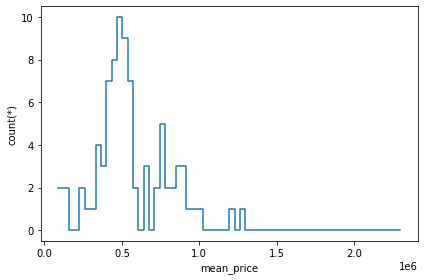

In [822]:
import matplotlib.pylab as plt
df_terr_19.plot1d(df_terr_19.mean_price);

In [720]:
df_mun = df_sell.groupby(by='municipality_same',
                agg={'mean_sold': vaex.agg.mean('sold_price'),
                     'mean_price': vaex.agg.mean('price'),
                     'make_money': vaex.agg.sum('earn_passive'),
                     'lose_money': vaex.agg.sum('earn_negative')
              }
          )
df_mun

#,municipality_same,mean_sold,mean_price,make_money,lose_money
0,oakville,1086410.2493371845,1104433.632715111,3703,9453
1,whitchurch-stouffville,995550.8333529846,1014199.3257184967,755,1959
2,brampton,705183.0925497172,705362.6387414708,12706,21588
3,mississauga,683363.2642513163,685699.2893657555,12976,24817
4,toronto,807908.8787039221,795236.7805790639,60685,80163
...,...,...,...,...,...
355,rama first nation 32,422500.0,445000.0,0,2
356,edwardsburghcardinal,130000.0,146250.0,0,2
357,greenstone,14000.0,18000.0,0,1
358,drummondnorth elmsley,321000.0,344950.0,0,2


In [427]:
df_sell.groupby(by='province_same',
              agg={'mean_sold': vaex.agg.mean('sold_price'),
                   'mean_price': vaex.agg.mean('price'),
              }
          )

#,province_same,mean_sold,mean_price
0,on,741588,740209
1,bc,487081,502858
2,ab,381967,397606
3,nb,159000,148000
4,ns,245000,245000


In [210]:
df_2019 = df_no_na[df_no_na['sold_price'] > df_no_na['price'] and df_no_na['year'] == '2019']
df_2019

NameError: name 'df_no_na' is not defined

In [172]:
df_t['updated_on'].str.slice(start=0, stop=7)
df_tt = df_t[df['updated_on'].str.contains('2019')]

df_tt

Expression = str_slice(updated_on, start=0, stop=7)
Length: 133,625 dtype: str (expression)
---------------------------------------
     0  2019-04
     1  2019-03
     2  2019-10
     3  2019-03
     4  2019-03
      ...      
133620  2020-06
133621  2020-06
133622  2020-07
133623  2020-07
133624  2020-08

In [149]:
df_tt.groupby(by='province_same',
              agg={'mean_sold': vaex.agg.mean('sold_price'),
                   'mean_price': vaex.agg.mean('price'),
              }
          )

AttributeError: 'DataFrameArrays' object has no attribute 'isnull'